# Link para o nosso repositório do GitHub:

https://github.com/NPaiffer/OdontoprevIOT?tab=readme-ov-file

In [1]:
# Carregar o arquivo

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [2]:
import os
print(os.listdir())

['.config', '.ipynb_checkpoints', 'PS_20174392719_1491204439457_log.csv', 'sample_data']


Verificar os tipos de transação e a distribuição de fraudes

In [3]:
# Verificar o número de fraudes e transações normais

print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [4]:
# Verificar os tipos de transações

print(df['type'].value_counts())

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [5]:
# Verificar valores nulos

print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# Treinar o Modelo Isolation Forest

In [6]:
# Imports

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [7]:
# Selecionar as features para o modelo

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df['isFraud']

In [8]:
# Dividir os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Criar o modelo Isolation Forest

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.05, random_state=42)

In [10]:
# Fazer previsões

y_pred = model.predict(X_test)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# Avaliar o Modelo

In [11]:
# Avaliar o Modelo

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1207876   63028]
 [   1080     540]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270904
           1       0.01      0.33      0.02      1620

    accuracy                           0.95   1272524
   macro avg       0.50      0.64      0.50   1272524
weighted avg       1.00      0.95      0.97   1272524



# Escolhendo Algoritmos para Testar

In [12]:
# Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Carregar os dados

df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [14]:
# Selecionar as features (removendo colunas não numéricas)

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = df['isFraud']

In [15]:
# Normalizar os dados para melhorar o desempenho de alguns modelos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Dividir entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelo 1: Árvores de Decisão

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Árvore de Decisão:")
print(classification_report(y_test, y_pred_dt))


Árvore de Decisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.91      0.96      0.93      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.98      0.97   1272524
weighted avg       1.00      1.00      1.00   1272524



# Modelo 2: Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


KeyboardInterrupt: 

# Modelo 3: XGBoost

In [32]:
# Instalar o XGBoost

!pip install xgboost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))


# Modelo 4: Regressão Logística

In [39]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Regressão Logística:")
print(classification_report(y_test, y_pred_lr))

KeyboardInterrupt: 

# Modelo 5: SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM:")
print(classification_report(y_test, y_pred_svm))

# Matriz de Confusão para cada Modelo

Matriz de confusão ajuda a entender alguns erros cometidos pelo modelo e mostra os verdadeiros positivos e falsos positivos, verdadeiros negativos e falsos negativos.

In [22]:
# Imports

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [23]:
# Função para desenhar matriz de confusão

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Fraude"], yticklabels=["Normal", "Fraude"])
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.show()

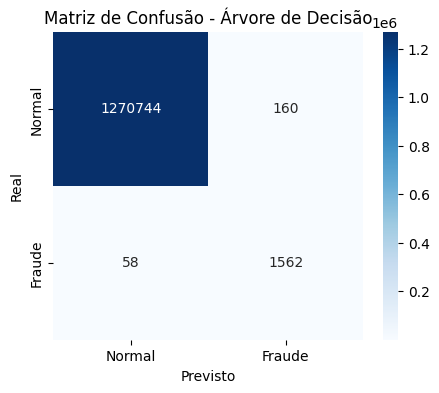

NameError: name 'y_pred_rf' is not defined

In [24]:
# Gerar matriz para cada modelo

plot_confusion_matrix(y_test, y_pred_dt, "Árvore de Decisão")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_confusion_matrix(y_test, y_pred_lr, "Regressão Logística")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# Comparação das Métricas (Precisão, Recall, F1-Score)

Gráfico de barras para comparação das metricas dos modelos

In [25]:
# Imports

import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
# Dicionário para armazenar as métricas

metrics = {
    "Modelo": ["Árvore de Decisão", "Random Forest", "XGBoost", "Regressão Logística", "SVM"],
    "Precisão": [
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_svm),
    ],
    "Recall": [
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_svm),
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_svm),
    ]
}

df_metrics = pd.DataFrame(metrics)

NameError: name 'y_pred_rf' is not defined

In [ ]:
# Plotando o gráfico de comparação das métricas

df_metrics.set_index("Modelo").plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Comparação de Modelos - Precisão, Recall e F1-Score")
plt.ylabel("Pontuação")
plt.xticks(rotation=30)
plt.legend(loc="lower right")
plt.show()

# Distribuição das Fraudes no Dataset

KeyboardInterrupt: 

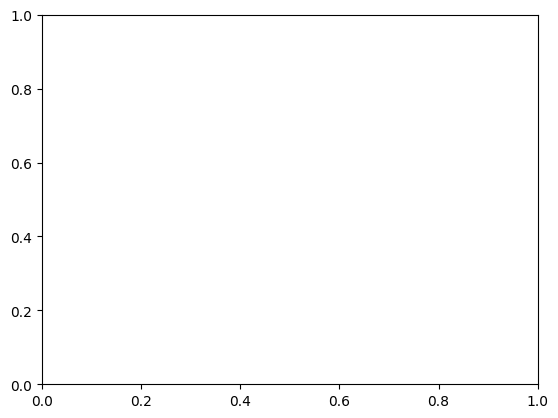

In [27]:
sns.countplot(x=df["isFraud"], palette="pastel")
plt.title("Distribuição de Fraudes no Dataset")
plt.xlabel("Fraude (0 = Normal, 1 = Fraudulenta)")
plt.ylabel("Quantidade")
plt.show()